## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

COLOR CONVERT TO HSV:


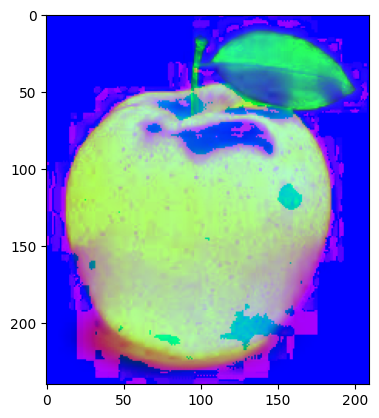

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 1.2 - Find the contour of the apple

# Opencv uses the bgr format, while matplotlib uses rgb
img = cv2.imread('red_apple.jpeg')   # Read the image
plt.imshow(img)   # Ploting the image using matplotlib

# convert the image to HSV color space
print("COLOR CONVERT TO HSV:")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

Image shape (240, 210, 3) Thresh (240, 210) [  0 254 255]


<Figure size 640x480 with 0 Axes>

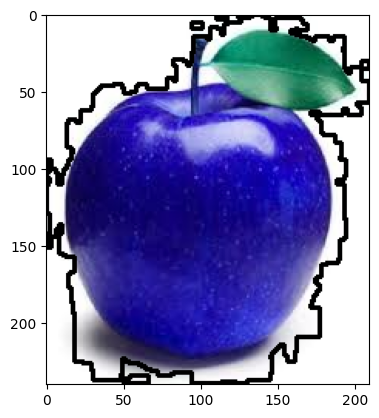

<Figure size 640x480 with 0 Axes>

In [41]:
# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)


# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

There are 1 apple
Image shape (240, 210, 3) Thresh (240, 210) [  0 254 255]


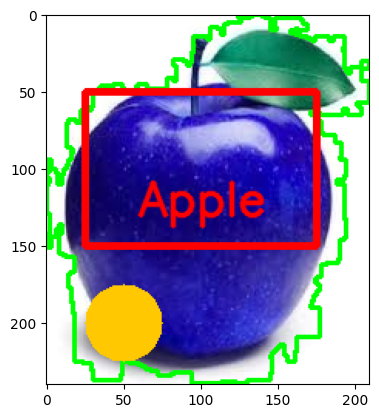

In [42]:
# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
main_contours = []
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)
        main_contours.append(c)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apple')
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
cv2.rectangle(im2,(25,50),(175,150),(255,0,0),3)
cv2.circle(im2,(50,200), radius=25, color=(255,200,0), thickness=-1) # negative thickness makes circle filled
font = cv2.FONT_HERSHEY_SIMPLEX
textcolor = (255,0,0)
cv2.putText(im2,'Apple',(60,130),font, 1,textcolor,2,cv2.LINE_AA)
plt.imshow(im2)    # show the image

### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels

## Part 3 (Only if you have extra time)
Follow this tutorial
https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/#sh17

Take any number of exercises, that you can test out and try to apply the techniques on other different images of your own choice. Be aware that using the camera requires you to not use the docker setup. So if you want to play with that you would have to install Anaconda and OpenCV on you own machine.